In [1]:
import sys
sys.path.append("..")

from generators.classifier_controller_generator import ClassifierControllerGenerator

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import pickle
import time


from xgboost import XGBClassifier
from keras.models import load_model
from sklearn.ensemble import RandomForestClassifier


2023-02-23 16:54:35.838431: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-23 16:54:35.981736: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-23 16:54:35.981768: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-23 16:54:36.917375: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
########################################### set up ###########################################

dataset_path = "../../dataset/balanced_wo_time/balanced_wo_time_equal_8/preprocessed_balanced_wo_time_equal_8_merged.csv"

controller_models_save_dir = '../../outputs/controller_ml/'

nn_save_dir = controller_models_save_dir + 'nn_model/'
rf_save_path = controller_models_save_dir + 'rf_model.pkl'
xgb_save_path = controller_models_save_dir + "xgb_model.json"

nn_figure_save_dir = nn_save_dir
nn_check_point_save_path = nn_save_dir + "nn_checkpoints.h5"

controller_clf_gen = ClassifierControllerGenerator()
X_train, X_test, y_train, y_test, X_val, y_val = controller_clf_gen.split_dataset(dataset_path)

dataframe shape: (213670, 60)
columns: Index(['bidirectional_bytes', 'src2dst_packets', 'src2dst_bytes',
       'dst2src_packets', 'dst2src_bytes', 'bidirectional_min_ps',
       'bidirectional_mean_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_max_ps', 'dst2src_min_ps', 'dst2src_max_ps',
       'bidirectional_syn_packets', 'bidirectional_cwr_packets',
       'bidirectional_ece_packets', 'bidirectional_urg_packets',
       'bidirectional_ack_packets', 'bidirectional_psh_packets',
       'bidirectional_rst_packets', 'bidirectional_fin_packets',
       'src2dst_syn_packets', 'src2dst_cwr_packets', 'src2dst_ece_packets',
       'src2dst_urg_packets', 'src2dst_ack_packets', 'src2dst_psh_packets',
       'src2dst_rst_packets', 'src2dst_fin_packets', 'dst2src_syn_packets',
       'dst2src_cwr_packets', 'dst2src_ece_packets', 'dst2src_urg_packets',
       'dst2src_ack_packets', 'dst2src_psh_packets', 'dst2src_rst_packets',
       'dst2src_fin_packets', 'splt_ps_1', 'splt_ps_2

2023-02-23 16:54:48.600778: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-23 16:54:48.600810: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-23 16:54:48.600837: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (komlab-virtual-machine): /proc/driver/nvidia/version does not exist
2023-02-23 16:54:48.601095: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                3600      
                                                                 
 dense_1 (Dense)             (None, 70)                4270      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 70)                0         
                                                                 
 batch_normalization (BatchN  (None, 70)               280       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 70)                0         
                                                                 
 dense_2 (Dense)             (None, 90)                6390      
                                                        

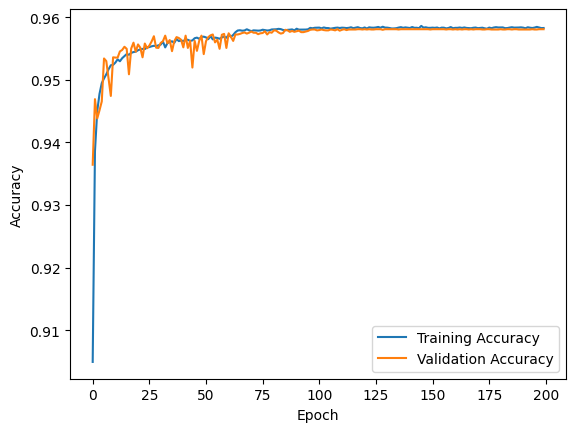

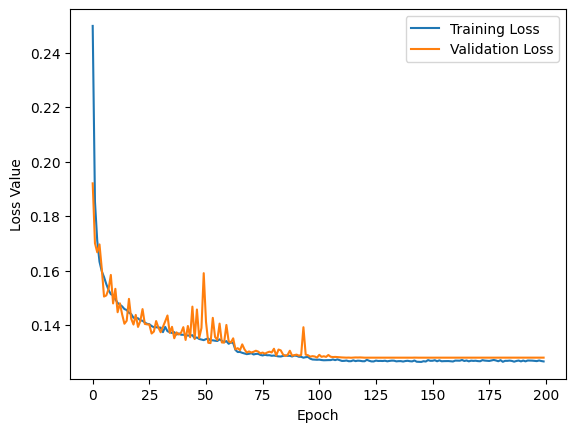

=== Confusion Matrix for validation set (RF) ===
[[10465   219]
 [  570 10113]]


=== Classification Report for validation set (RF) ===
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     10684
           1       0.98      0.95      0.96     10683

    accuracy                           0.96     21367
   macro avg       0.96      0.96      0.96     21367
weighted avg       0.96      0.96      0.96     21367



=== Confusion Matrix for validation set (XGB) ===
[[10613    71]
 [  785  9898]]


=== Classification Report for validation set (XGB) ===
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10684
           1       0.99      0.93      0.96     10683

    accuracy                           0.96     21367
   macro avg       0.96      0.96      0.96     21367
weighted avg       0.96      0.96      0.96     21367



INFO:tensorflow:Assets written to: ../../outputs/controller_ml/nn_mo

<Figure size 640x480 with 0 Axes>

In [3]:
########################################### train controller ml models ###########################################
model_nn, model_rf, model_xgb = controller_clf_gen.train_all(X_train, y_train, X_val, y_val, 
                                                            check_point_path=nn_check_point_save_path, 
                                                            fig_save_path=nn_figure_save_dir,
                                                            save_models=True,
                                                            nn_dir=nn_save_dir, rf_path=rf_save_path, xgb_path=xgb_save_path)

In [4]:
########################################### load controller ml models ###########################################
nn_loaded_model = load_model(nn_save_dir)

with open(rf_save_path, 'rb') as f:
    rf_loaded_model = pickle.load(f)

xgb_loaded_model = XGBClassifier()
xgb_loaded_model.load_model(xgb_save_path)

In [4]:
row = X_test.iloc[:1]

In [5]:
y_predict_nn = np.array(
    list(map(lambda x: [1 - x[0], x[0]], nn_loaded_model.predict(row))))
y_predict_rf = rf_loaded_model.predict_proba(row)
y_predict_xgb = xgb_loaded_model.predict_proba(row)

# compute the final predicted label from each trained model
y_predict = np.array([y_predict_nn, y_predict_rf, y_predict_xgb]).mean(
    axis=0).argmax(axis=1)[0]

print(y_predict)

NameError: name 'row' is not defined

1336/1336 [==============================] - 2s 2ms/step
=== Confusion Matrix for the test set ===
[[21281    86]
 [ 1546 19821]]


=== Plot confusion matrix ===


=== Classification Report for the test set ===
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     21367
           1       1.00      0.93      0.96     21367

    accuracy                           0.96     42734
   macro avg       0.96      0.96      0.96     42734
weighted avg       0.96      0.96      0.96     42734

(0.963976548425977, 0.9618102681705434, 0.9617656396542007, None)


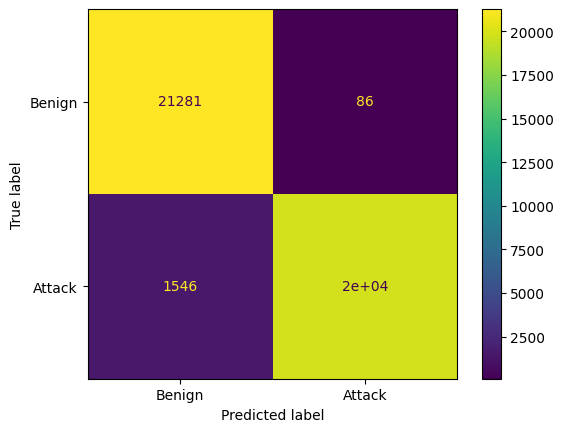

In [7]:
########################################### test controller ml models ###########################################
y = controller_clf_gen.test(X_test, y_test, model_nn=nn_loaded_model, model_rf=xgb_loaded_model, model_xgb=xgb_loaded_model)

<class 'numpy.ndarray'>


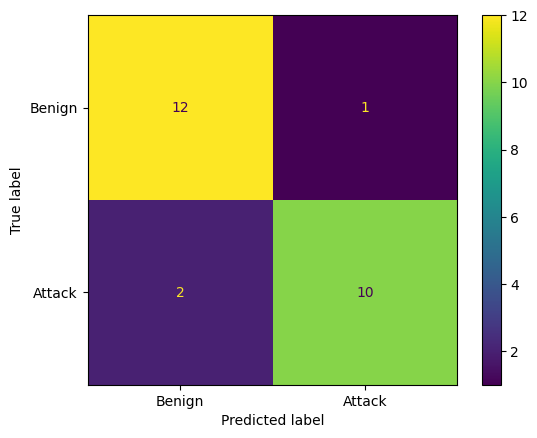

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Benign", "Attack"])
disp.plot()
plt.show()